### Daily ice-numeral calculation: Open Water Vessels(OW):

#### Taking daily icefrac and icethic data for MJJASO and finding how many navigable days come up in 2035, 2050, 2069 in SSP and ARISE:

In [1]:
#following the exact same approach as PC6 IN calculation, only changing limits in the ice_numeral function
import io
import os
import sys
import warnings
import numpy as np
import xarray as xr
import pandas as pd
# for calculations and masking regions
import numpy as np
import numpy.ma as ma

# for making figures
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.path as mpath

# for making maps
import cartopy
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import cartopy.feature as cfeature

workingdir = '/Users/dpathak/Desktop/REU/notebooks/'   
dataDir = '/Users/dpathak/Desktop/REU/data/icefracDaily/'
figuredir = '/Users/dpathak/Desktop/REU/figures/Ice Numeral/'
ens = ['001','002','003','004','005','006','007','008','009','010']
   

In [2]:
###ICEFRAC DAILY DATA
#### read data
# make empty dictionaries to hold all ensemble members
icefracDailyCONTROL  = {}
icefracDailyFEEDBACK = {}
icefracDailyFEEDBACKGrouped = {}
icefracDailyCONTROLGrouped = {}

for ensNum in range(len(ens)):
    ## ARISE
    ds = xr.open_dataset(dataDir +
                             'b.e21.BW.f09_g17.SSP245-TSMLT-GAUSS-DEFAULT.' + str(ens[ensNum]) +
                             '.cice.h1.aice_d_only.may-october.20350101-20691231_RG_NH.nc')

    latIceIN = ds.lat; lonIceIN = ds.lon
    time = ds.time
    # print(ds.keys())
    icefracDailyFEEDBACK[ens[ensNum]] =ds.aice_d
    ds.close()
       
    ## SSP
    ds = xr.open_dataset(dataDir +
                             'b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.' + str(ens[ensNum]) +
                             '.cice.h1.aice_d_only.may-october.20150101-20691231_RG_NH.nc')
    # ds['time'] = pd.date_range(start=pd.to_datetime("2015-01-01"),periods=ds.sizes['time'], freq='MS')
    # print(ds.time)
    icefracDailyCONTROL[ens[ensNum]] = ds.aice_d
    time = ds.time
    ds.close()

In [3]:
#getting daily ensemble means
random1 = 0
random2 = 0
for ensNum in range(len(ens)):
    random1 = random1 + icefracDailyCONTROL[ens[ensNum]]
    icefracDailyEnsmeanSSP = random1
    random2 = random2 + icefracDailyFEEDBACK[ens[ensNum]]
    icefracDailyEnsmeanARISE = random2
    
icefracDailyEnsmeanSSP = icefracDailyEnsmeanSSP/10
icefracDailyEnsmeanARISE = icefracDailyEnsmeanARISE/10

In [4]:
###ICETHIC DAILY DATA
dataDir = '/Users/dpathak/Desktop/REU/data/icethicDaily/'
icethicDailyCONTROL  = {}
icethicDailyFEEDBACK = {}
icethicDailyFEEDBACKGrouped = {}
icethicDailyCONTROLGrouped = {}

for ensNum in range(len(ens)):
    ## ARISE
    ds = xr.open_dataset(dataDir +
                             'b.e21.BW.f09_g17.SSP245-TSMLT-GAUSS-DEFAULT.' + str(ens[ensNum]) +
                             '.cice.h1.sithick_d_only.may-october.20350101-20691231_RG_NH.nc')

    latIceIN = ds.lat; lonIceIN = ds.lon
    time = ds.time
    # print(ds.keys())
    icethicDailyFEEDBACK[ens[ensNum]] =ds.sithick_d
    ds.close()
       
    ## SSP
    ds = xr.open_dataset(dataDir +
                             'b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.' + str(ens[ensNum]) +
                             '.cice.h1.sithick_d_only.may-october.20150101-20691231_RG_NH.nc')
    # ds['time'] = pd.date_range(start=pd.to_datetime("2015-01-01"),periods=ds.sizes['time'], freq='MS')
    # print(ds.time)
    # print(ds.keys())
    icethicDailyCONTROL[ens[ensNum]] = ds.sithick_d
    time = ds.time
    ds.close()

In [5]:
#getting daily ensemble means
random3 = 0
random4 = 0
for ensNum in range(len(ens)):
    random3 = random3 + icethicDailyCONTROL[ens[ensNum]]
    icethicDailyEnsmeanSSP = random3
    random4= random4 + icethicDailyFEEDBACK[ens[ensNum]]
    icethicDailyEnsmeanARISE = random4
    
icethicDailyEnsmeanSSP = icethicDailyEnsmeanSSP/10
icethicDailyEnsmeanARISE = icethicDailyEnsmeanARISE/10

In [6]:
###getting data from 2035 to 2069 MJJASO
years = ['2035','2036','2037','2038','2039','2040',
         '2041','2042','2043','2044','2045','2046','2047','2048','2049','2050',
         '2051','2052','2053','2054','2055','2056','2057','2058','2059','2060',
         '2061','2062','2063','2064','2065','2066','2067','2068','2069']

In [12]:
import geopandas as gpd

<Axes: >

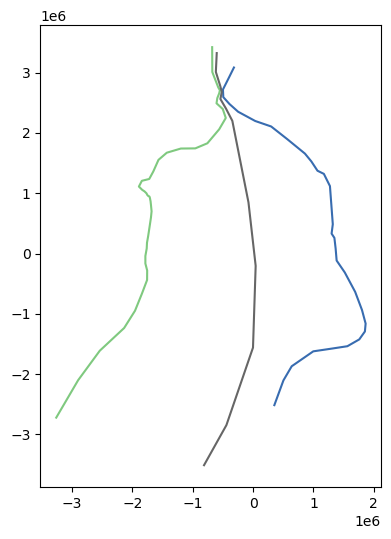

In [13]:
fname = r'/Users/dpathak/Desktop/REU/data/Shipping_and_Hydrography/Arctic_Sea_Routes.shp'
shapes = gpd.read_file(fname)
shippingRoutes = shapes.loc[:, 'geometry']
fig,ax = plt.subplots(figsize=(8,6))
shippingRoutes.plot(ax=ax, cmap='Accent')

In [14]:
#open water OW vessels

def ice_numeral_OW(icefrac, icethic):
    IN = []
    if np.isnan(icethic.values):
        IN = np.nan
    elif icethic.values == 0.0:
        IN = icefrac*2
    elif 0 < icethic.values < 0.15:
        IN = icefrac*1
    elif 0.15 <= icethic.values < 0.7:
        IN = icefrac*(-1)
    elif 0.7 <= icethic.values < 1.2:
        IN = icefrac*(-2)
    elif 1.2 <= icethic.values < 1.51:
        IN = icefrac*(-3)
    else:
        IN = icefrac*(-4)
    return IN
    print(IN)
    IN = np.nan_to_num(IN,nan=1)
    print(IN)
    IN[IN>=0] = 1
    IN[IN<0] = 0
    INsum = np.sum(IN, axis = 0)
    return INsum


In [ ]:
SSP_iceNumeral = np.zeros((len(years),len(latIceIN),len(lonIceIN)))
ARISE_iceNumeral = np.zeros((len(years),len(latIceIN),len(lonIceIN)))
for iyear in range(len(years)):
    print(years[iyear])
    icefracSSP = icefracDailyEnsmeanSSP.sel(time=slice(str(years[iyear] + '-05-01'), str(years[iyear] + '-10-31')))
    icefracARISE = icefracDailyEnsmeanARISE.sel(time=slice(str(years[iyear] + '-05-01'), str(years[iyear] + '-10-31')))
    icethicSSP = icethicDailyEnsmeanSSP.sel(time=slice(str(years[iyear] + '-05-01'), str(years[iyear] + '-10-31'))) 
    icethicARISE = icethicDailyEnsmeanARISE.sel(time=slice(str(years[iyear] + '-05-01'), str(years[iyear] + '-10-31')))
    for ilat in range(len(latIceIN)):
        for ilon in range(len(lonIceIN)):
            for iday in range(len(icefracSSP[:,ilat,ilon])):
                #print(icethicSSP[iday,ilat,ilon])
                SSP_iceNumeral[iyear,ilat,ilon] = ice_numeral_OW(icefracSSP[iday,ilat,ilon],icethicSSP[iday,ilat,ilon])
                ARISE_iceNumeral[iyear,ilat,ilon] = ice_numeral_OW(icefracARISE[iday,ilat,ilon],icethicARISE[iday,ilat,ilon])
np.save('OWIceNum_SSP.npy',SSP_iceNumeral)
np.save('OWIceNum_ARISE.npy',ARISE_iceNumeral)

In [ ]:
ARISE_inOW = np.load('OWIceNum_ARISE.npy')
SSP_inOW = np.load('OWIceNum_SSP.npy')

In [ ]:
SSP_in2035 = SSP_inOW[0]
ARISE_in2035 = ARISE_inOW[0]
SSP_in2050 = SSP_inOW[15]
ARISE_in2050 = ARISE_inOW[15]
SSP_in2069 = SSP_inOW[34]
ARISE_in2069 = ARISE_inOW[34]

In [ ]:
def subplots(ax, var, latplot, lonplot, norm, i, mycmap, nameIN):
    var,lon = add_cyclic_point(var,coord=lonplot)
    ax.set_extent([180, -180, 50, 90], crs=ccrs.PlateCarree())
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    ax.set_boundary(circle, transform=ax.transAxes)
    ax.set_facecolor('0.98')
    
    cf1 = ax.pcolormesh(lon,latplot,var,transform=ccrs.PlateCarree(), 
                  norm=norm, cmap=mycmap)
    ax.coastlines(linewidth=-0.8)
    ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', edgecolor = 'black', facecolor = 'black'))
    ax.set_title(str(nameIN))
    plt.savefig(figuredir + str(nameIN) + '.jpg', dpi=1000, bbox_inches='tight')
    return cf1

In [ ]:
#plotting SSP for 2035, 2050, 2069
fig = plt.figure(figsize =(10,6))
cols = 3; rows =1 
vmins = 0
vmaxs = 25
INdictnew5 = {}
INdictnew5[0] = SSP_in2035
INdictnew5[1] = SSP_in2050
INdictnew5[2] = SSP_in2069

nameIN5 = {}
nameIN5[0] = ('SSP2-4.5 2035')
nameIN5[1] = ('SSP2-4.5 2050')
nameIN5[2] = ('SSP2-4.5 2069')

for i in range(1, cols*rows+1):
    mycmap = 'tab20b'
    norm = mcolors.Normalize(vmin=vmins, vmax=vmaxs)
    ax = fig.add_subplot(rows, cols, i, projection=ccrs.NorthPolarStereo())
cf1 = subplots(ax, INdictnew5[i-1], latIceIN, lonIceIN, norm, i, mycmap, nameIN5[i-1])
shippingRoutes.plot(ax=ax, cmap='cubehelix', linestyle='--')
cbar_ax = fig.add_axes([0.14, 0.18, 0.75, 0.04])
cbar = plt.colorbar(cf1, cax=cbar_ax, orientation = 'horizontal', extend ='max')
cbar.set_label('No. of OW Navigable Days', fontsize = 10)

In [ ]:
#plotting ARISE for 2035, 2050, 2069
fig = plt.figure(figsize =(10,6))
cols = 3; rows =1 
vmins = 0
vmaxs = 25
INdictnew6 = {}
INdictnew6[0] = ARISE_in2035
INdictnew6[1] = ARISE_in2050
INdictnew6[2] = ARISE_in2069

nameIN6 = {}
nameIN6[0] = ('ARISE-1.5 2035')
nameIN6[1] = ('ARISE-1.5 2050')
nameIN6[2] = ('ARISE-1.5 2069')

for i in range(1, cols*rows+1):
    mycmap = 'tab20b'
    norm = mcolors.Normalize(vmin=vmins, vmax=vmaxs)
    ax = fig.add_subplot(rows, cols, i, projection=ccrs.NorthPolarStereo())
cf1 = subplots(ax, INdictnew6[i-1], latIceIN, lonIceIN, norm, i, mycmap, nameIN6[i-1])
shippingRoutes.plot(ax=ax, cmap='cubehelix', linestyle='--')
cbar_ax = fig.add_axes([0.14, 0.18, 0.75, 0.04])
cbar = plt.colorbar(cf1, cax=cbar_ax, orientation = 'horizontal', extend ='max')
cbar.set_label('No. of OW Navigable Days', fontsize = 10)

In [ ]:
#differences:
SSP2050_35 = SSP_in2050 - SSP_in2035
SSP2069_50 = SSP_in2069 - SSP_in2050
ARISE2050_35 = ARISE_in2050 - ARISE_in2035
ARISE2069_50 = ARISE_in2069 - ARISE_in2050

In [ ]:
#plotting SSP differences
fig = plt.figure(figsize =(10,6))
cols = 2; rows =1 
vmins = -20
vmaxs = 20
INdictnew7 = {}
INdictnew7[0] = SSP2050_35
INdictnew7[1] = SSP2069_50

nameIN7 = {}
nameIN7[0] = ('SSP 2050-35 diff')
nameIN7[1] = ('SSP 2069-50 diff')

for i in range(1, cols*rows+1):
    mycmap = 'BrBG'
    norm = mcolors.TwoSlopeNorm(vmin=vmins, vcenter=0, vmax=vmaxs)
    ax = fig.add_subplot(rows, cols, i, projection=ccrs.NorthPolarStereo())
cf1 = subplots(ax, INdictnew7[i-1], latIceIN, lonIceIN, norm, i, mycmap, nameIN7[i-1])
shippingRoutes.plot(ax=ax, cmap='cubehelix', linestyle='--')
cbar_ax = fig.add_axes([0.14, 0.18, 0.75, 0.04])
cbar = plt.colorbar(cf1, cax=cbar_ax, orientation = 'horizontal', extend ='max')
cbar.set_label('Difference in no. of OW Navigable Days', fontsize = 10)

In [ ]:
#plotting ARISE differences
fig = plt.figure(figsize =(10,6))
cols = 2; rows =1 
vmins = -20
vmaxs = 20
INdictnew8 = {}
INdictnew8[0] = ARISE2050_35
INdictnew8[1] = ARISE2069_50

nameIN8 = {}
nameIN8[0] = ('ARISE 2050-35 diff')
nameIN8[1] = ('ARISE 2069-50 diff')

for i in range(1, cols*rows+1):
    mycmap = 'BrBG'
    norm = mcolors.TwoSlopeNorm(vmin=vmins, vcenter=0, vmax=vmaxs)
    ax = fig.add_subplot(rows, cols, i, projection=ccrs.NorthPolarStereo())
cf1 = subplots(ax, INdictnew8[i-1], latIceIN, lonIceIN, norm, i, mycmap, nameIN8[i-1])
shippingRoutes.plot(ax=ax, cmap='cubehelix', linestyle='--')
cbar_ax = fig.add_axes([0.14, 0.18, 0.75, 0.04])
cbar = plt.colorbar(cf1, cax=cbar_ax, orientation = 'horizontal', extend ='max')
cbar.set_label('Difference in no. of OW Navigable Days', fontsize = 10)